In [1]:
from vca_helper import *
from competition_plots import *

from matplotlib.lines import Line2D
import seaborn as sns

from copy import deepcopy as dc

import matplotlib
matplotlib.rcParams.update({'font.size': 10, 'figure.figsize' : [3.125, 1.93],
                           'legend.fontsize': 8, 'legend.fancybox': True,
                           'font.family': 'serif', 'font.sans-serif': 'Times'})

In [2]:
dl_ds = build_dl_dataset()
ul_ds = build_ul_dataset()

In [3]:
# for vca in VCAs: plot_bw(vca)

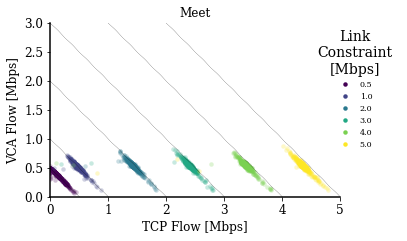

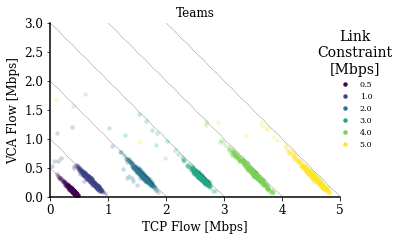

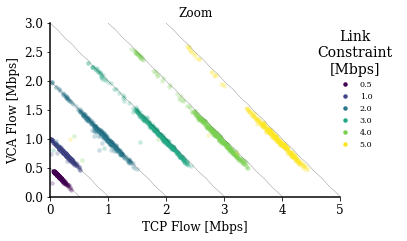

In [4]:
for vca in VCAs: plot_iperf_competition(dl_ds, vca)

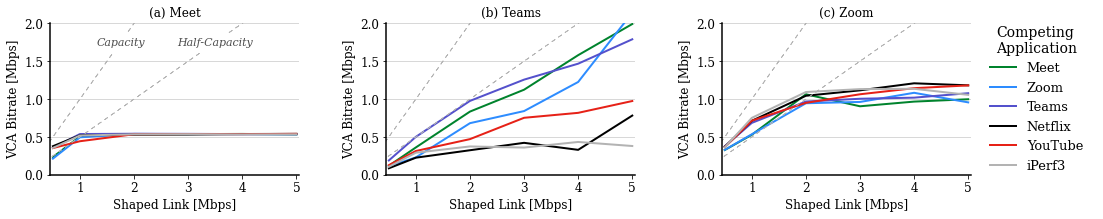

In [5]:
table = {}

flows = ["meet", "teams", "zoom", "netflix", "youtube", "iperf"]
profiles = {}
for vca in VCAs:
    profiles[vca] = get_profiles(dl_ds, vca)
            
    table[vca] = {k : profiles[vca][k].fr_vca.loc[0.5] for k in flows}
    
for tag in ["vca", "app", "all"]:
    bitrate_competition(profiles, tag)
    if tag != "all": plt.close("all")

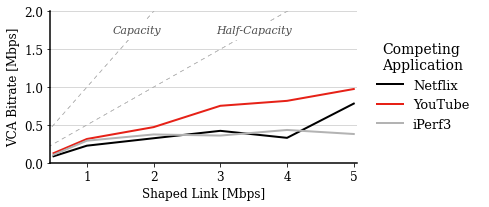

In [6]:
bitrate_competition(profiles, "app", VCAs = ["teams"])

In [7]:
def add_colors(v): 
    
    return "cb" + int(v*5) * "s" + "{" + str(v) + "}"

import matplotlib.pyplot as plt

N = 5
# ["{0:.2f}, {1:.2f}, {2:.2f}".format(*[v for v in plt.get_cmap("Blues")(n/(N-1))][:3]) for n in range(N)]

In [8]:
ftable = pd.DataFrame(table).T.round(2)
ftable.columns = ftable.columns.map(labels)
ftable.index = ftable.index.str.title()

lftable = ftable.applymap(add_colors).to_latex()
lftable = lftable.replace("cb", "\cb")
lftable = lftable.replace("\{", "{").replace("\}", "}")

print(lftable)

\begin{tabular}{lllllll}
\toprule
{} &         Meet &        Teams &         Zoom &      Netflix &      YouTube &       iPerf3 \\
\midrule
Meet  &   \cbss{0.47} &  \cbsss{0.74} &   \cbss{0.43} &  \cbsss{0.76} &  \cbsss{0.71} &  \cbsss{0.72} \\
Teams &    \cbs{0.25} &   \cbss{0.41} &    \cbs{0.23} &     \cb{0.17} &    \cbs{0.26} &    \cbs{0.22} \\
Zoom  &  \cbsss{0.66} &  \cbsss{0.76} &  \cbsss{0.68} &  \cbsss{0.75} &  \cbsss{0.73} &  \cbsss{0.72} \\
\bottomrule
\end{tabular}



### Box Plots

In [9]:
for vca in []: #"teams", "meet", "zoom"]:
    for cap in [0.5, 1]:
        box_plot_single(dl_ds, A = vca, shape = cap, D = "dl")
        
plt.close("all")

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Incumbent Flow: Zoom'}, xlabel='Competing Flow', ylabel="Competing Flow's Share of Link">

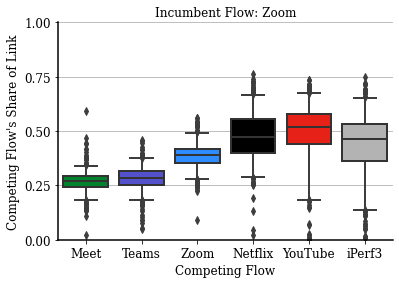

In [10]:
box_plot_single(dl_ds, A = "zoom", shape = 2, D = "dl")

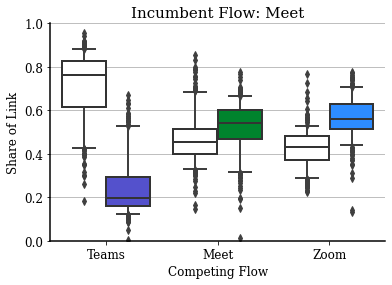

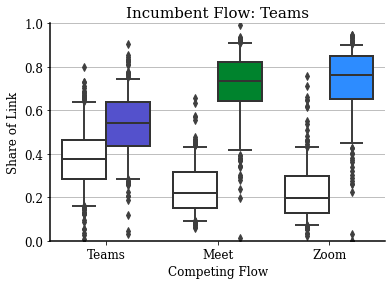

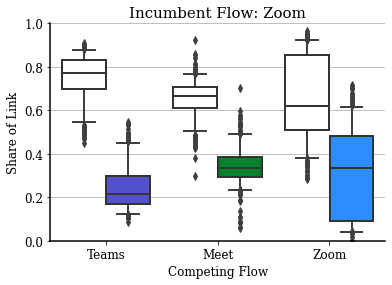

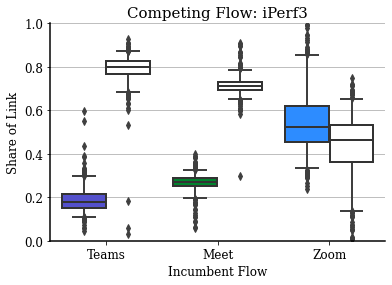

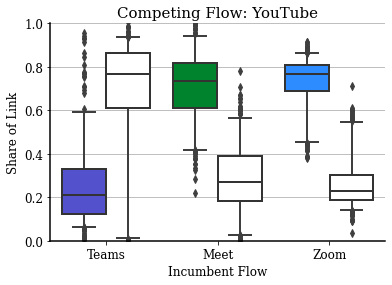

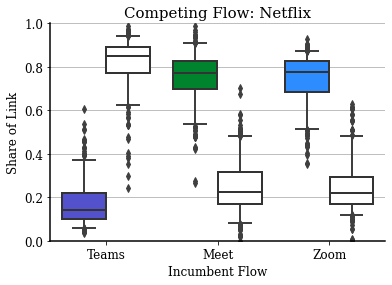

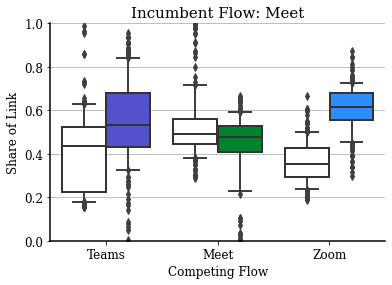

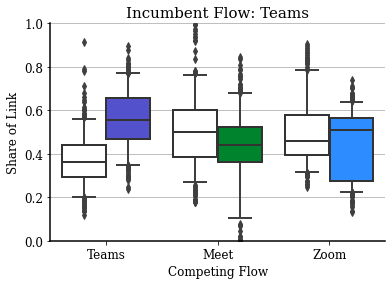

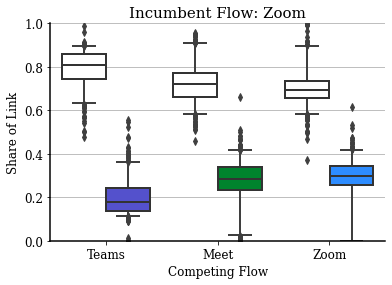

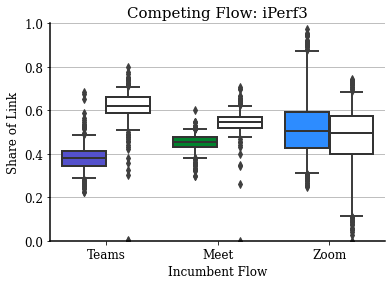

In [11]:
for tag, ds in {"dl" : dl_ds, "ul" : ul_ds}.items():
    
    iperf = {"dl" : "iperf", "ul" : "iperfup"}

    for vca in VCAs:
        box_plot(ds, A = vca, B = None, shape = 0.5, D = tag, comp_apps = ["teams", "meet", "zoom"])

    box_plot(ds, A = None, B = iperf[tag], shape = 2, D = tag, comp_apps = ["teams", "meet", "zoom"])
    
    if tag == "dl":
        box_plot(ds, A = None, B = "youtube", shape = 0.5, D = tag, comp_apps = ["teams", "meet", "zoom"])
        box_plot(ds, A = None, B = "netflix", shape = 0.5, D = tag, comp_apps = ["teams", "meet", "zoom"])

### Time Series

In [12]:
# for vca in VCAs:
#     for f in ["meet", "teams", "zoom", "netflix", "youtube", "iperf"]:
#         time_series(df = dl_ds, A = vca, B = f, d = "dl", ymax = 4)
        
#         plt.close("all")
        
# for vca in VCAs:
#     for f in ["meet", "teams", "zoom", "iperfup"]:
#         time_series(df = ul_ds, A = vca, B = f, d = "ul", ymax = 4)
        
#         plt.close("all")

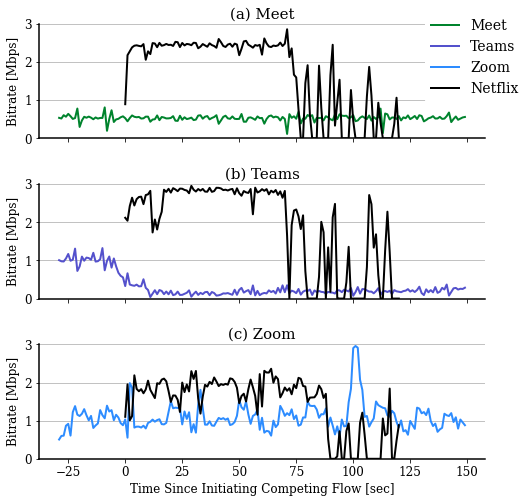

In [13]:
netflix_time_series(dl_ds, runs = [1, 1, 2])

### Upload Competition

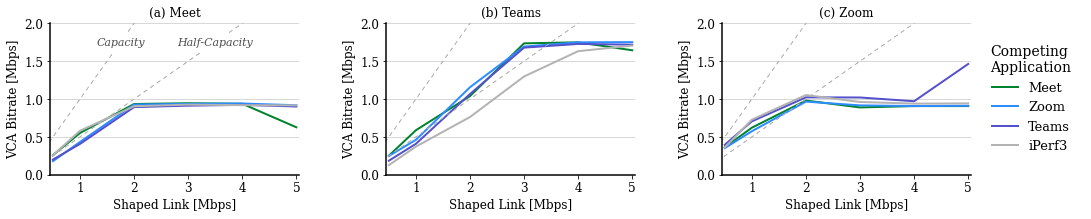

In [14]:
profiles = {}
for vca in VCAs:
    profiles[vca] = get_profiles(ul_ds, vca, "ul")

bitrate_competition(profiles, "all", D = "ul")

In [15]:
for vca in []: #"zoom", "teams", "meet"]:
    for cap in [0.5, 1.0]:
        box_plot_single(ul_ds, A = vca, shape = cap, D = "ul")

In [16]:
speeds = {
    "dl" : ["a_pcap_dl_mbps", "b_pcap_dl_mbps"],
    "ul" : ["a_pcap_ul_mbps", "b_pcap_ul_mbps"],
}
    
flows = {
    "dl" : ["zoom", "meet", "teams", "iperf", "youtube", "netflix"],
    "ul" : ["zoom", "meet", "teams", "iperfup"]
}

direction = { "dl" : "Downstream", "ul" : "Upstream" }
    

for D, ds in {}: # {"dl" : dl_ds, "ul" : ul_ds}.items():
    for s in [0.5, 1, 2, 3, 4, 5]:
        for A in ["zoom", "meet", "teams"]:
            for B in flows[D]:
                for run in [1, 2, 3]:
                
                    ax = plot_time_series(ds, A, B, D, s, run)
                    ax.legend(fontsize = 13, frameon = True, loc = "upper left", bbox_to_anchor = (1, 1))
                    ax.set_title(f"Symmetric Constraint at {s:.1f} Mbps")
                    
                    ax.set_ylabel(direction[D] + " Bitrate [Mbps]")
                    ax.figure.savefig(f"ts_checks/{A}_{B}_{s}_{D}_r{run}.pdf")

                    plt.close("all")